In [1]:
import sklearn as sk
import sklearn.tree as tree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import pickle


# NOT: Bazı değerler markdown la farklı olabilir çünkü farklı bilgisayarlarda çalıştırıldı!!!

In [2]:
import matplotlib.pyplot as plt 
np.random.seed(12345)

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df['Male'] = df.Gender == 'Male'
df['OverTime'] = df.OverTime == 'Yes'
df['Attrition'] = df.Attrition == 'Yes'

<AxesSubplot:xlabel='Attrition', ylabel='count'>

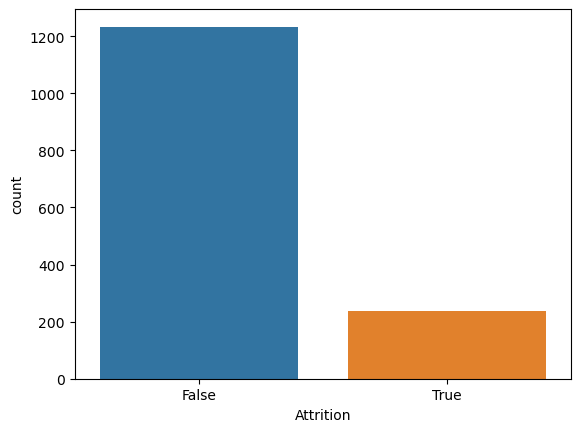

In [7]:
sns.countplot(x='Attrition', data=df)

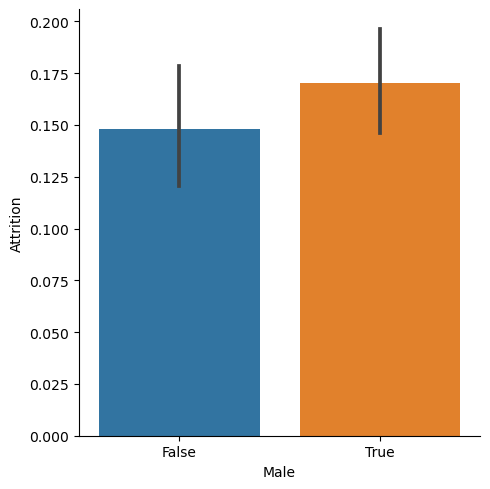

In [8]:
sns.catplot(data=df,x = 'Male', y='Attrition', kind="bar")

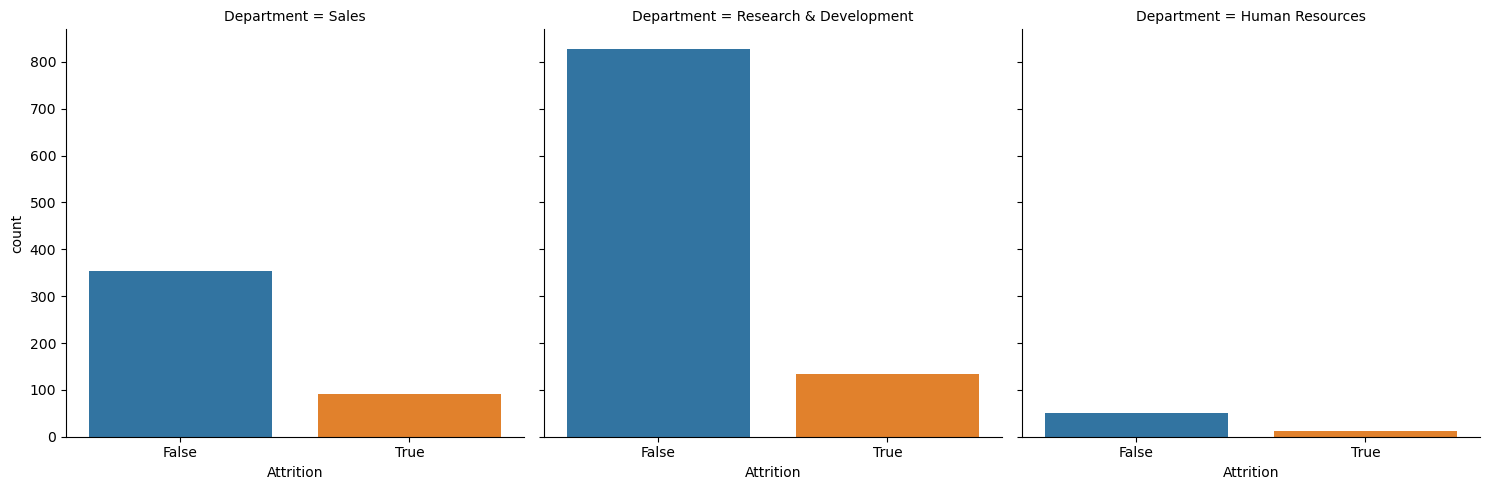

In [9]:
sns.catplot(data=df,col='Department',x='Attrition',kind='count')

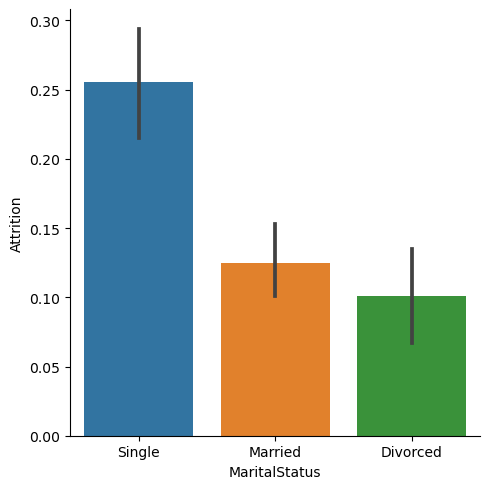

In [10]:
sns.catplot(data=df,x = 'MaritalStatus', y='Attrition', kind="bar")

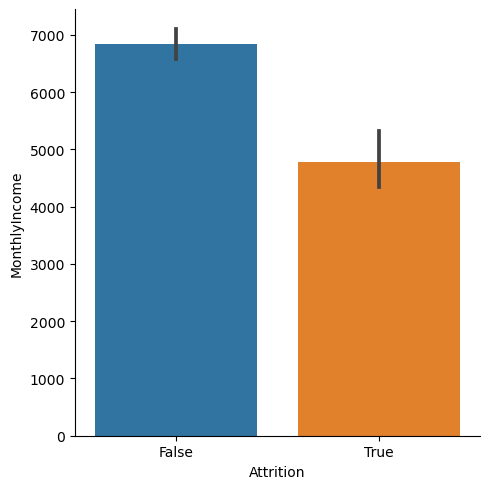

In [11]:
sns.catplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

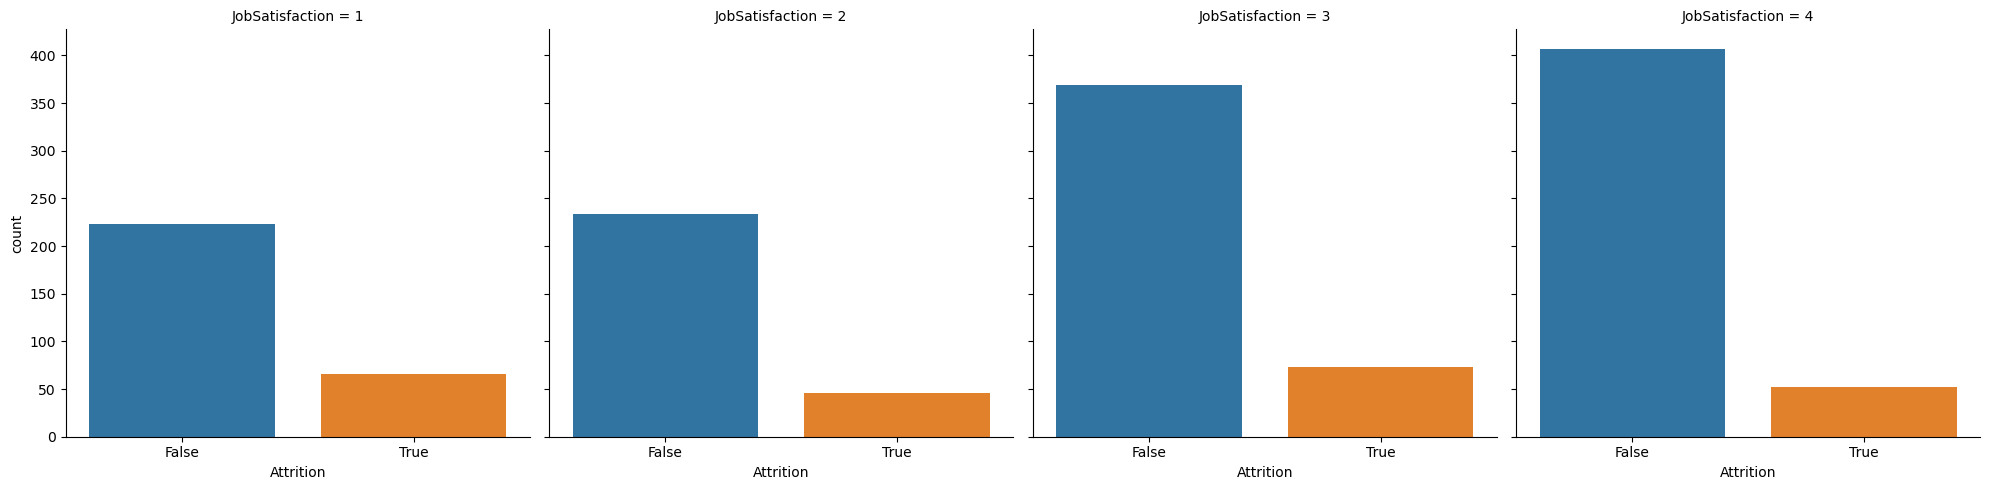

In [12]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

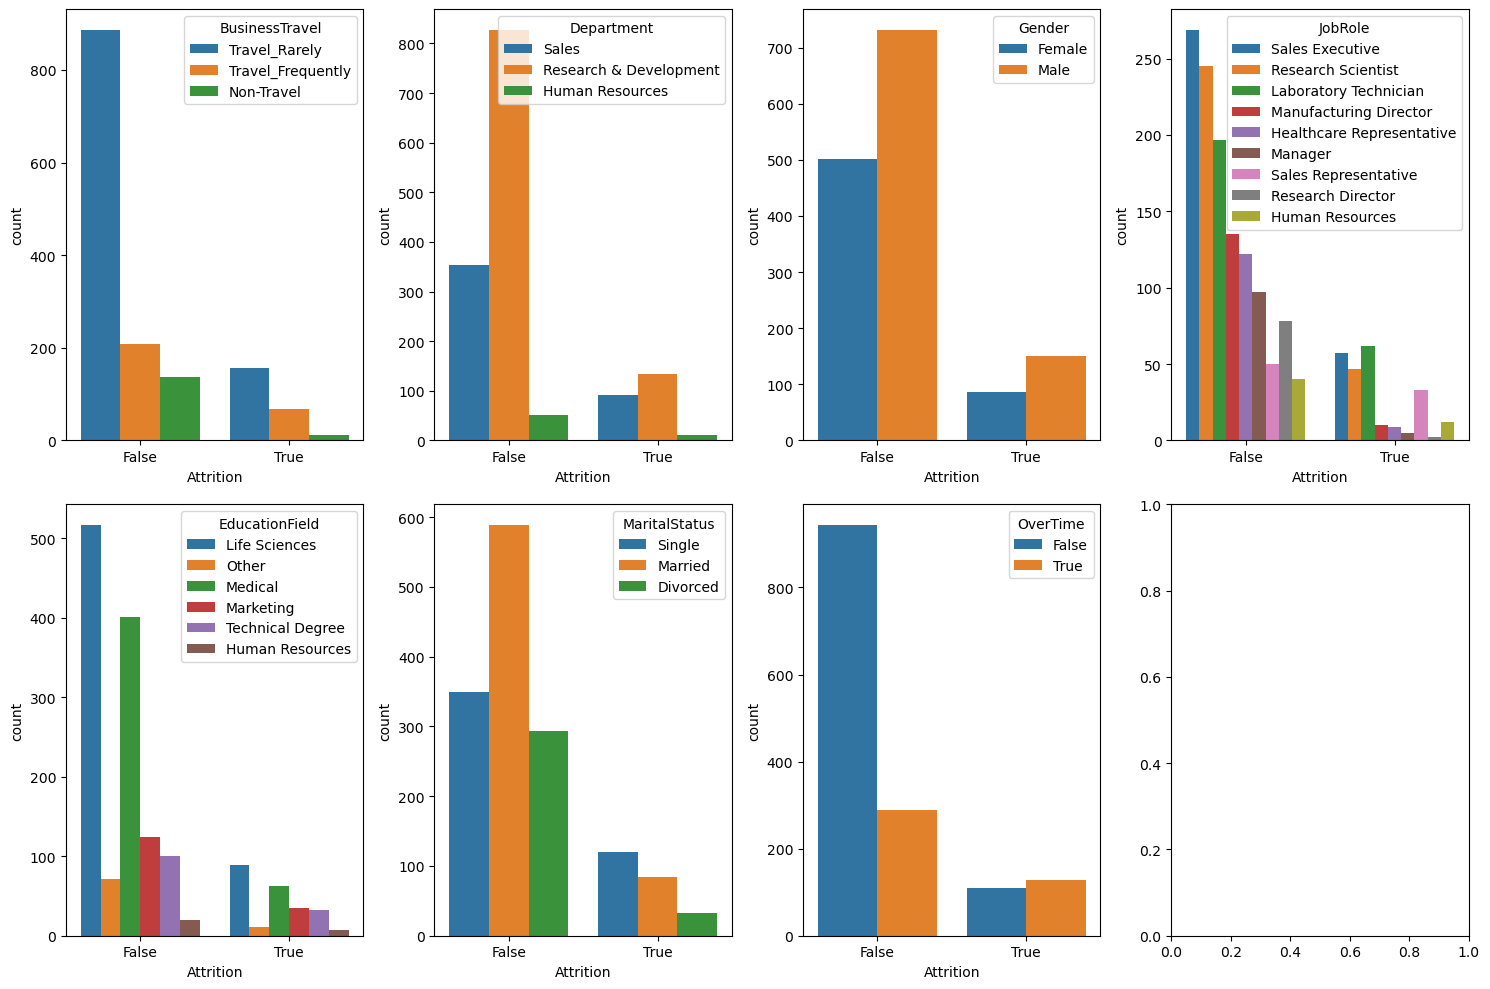

In [13]:
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()

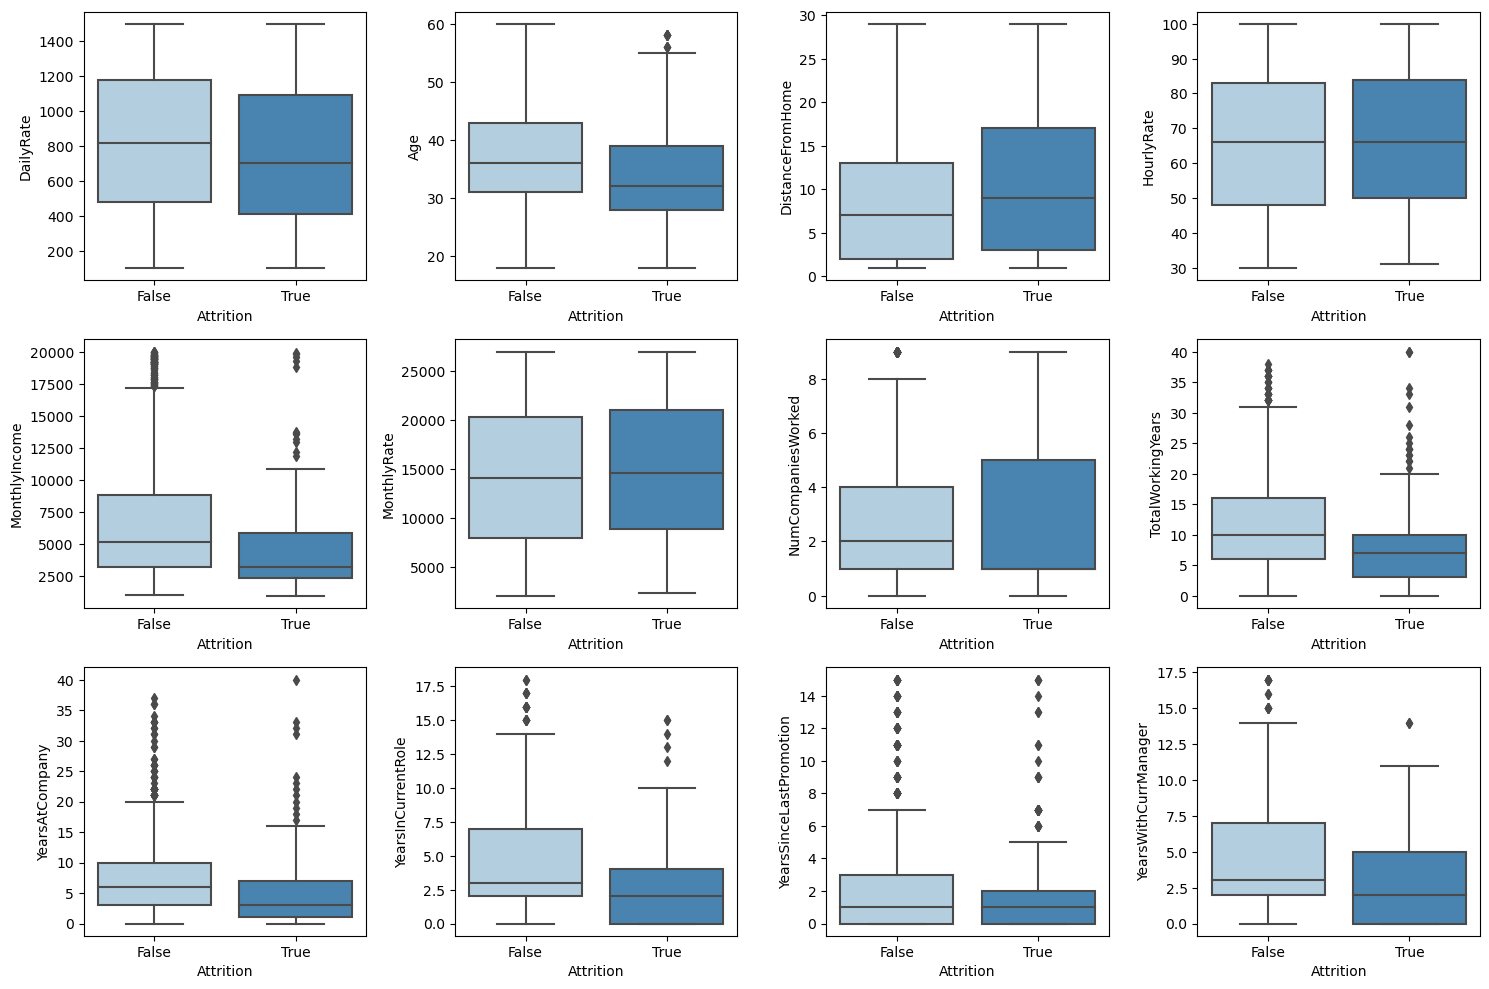

In [14]:
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=df, ax=axss[0][0],palette="Blues")
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][1],palette="Blues")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axss[0][2],palette="Blues")
sns.boxplot(x='Attrition', y ='HourlyRate', data=df, ax=axss[0][3],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[1][0],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=df, ax=axss[1][1],palette="Blues")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=df, ax=axss[1][2],palette="Blues")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][3],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[2][0],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axss[2][1],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][2],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][3],palette="Blues")
plt.tight_layout()

In [15]:
pd.crosstab(columns=[df.Attrition],index=[df.MaritalStatus],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,False,True
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


In [16]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,False,True
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [17]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,False,True
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


<AxesSubplot:>

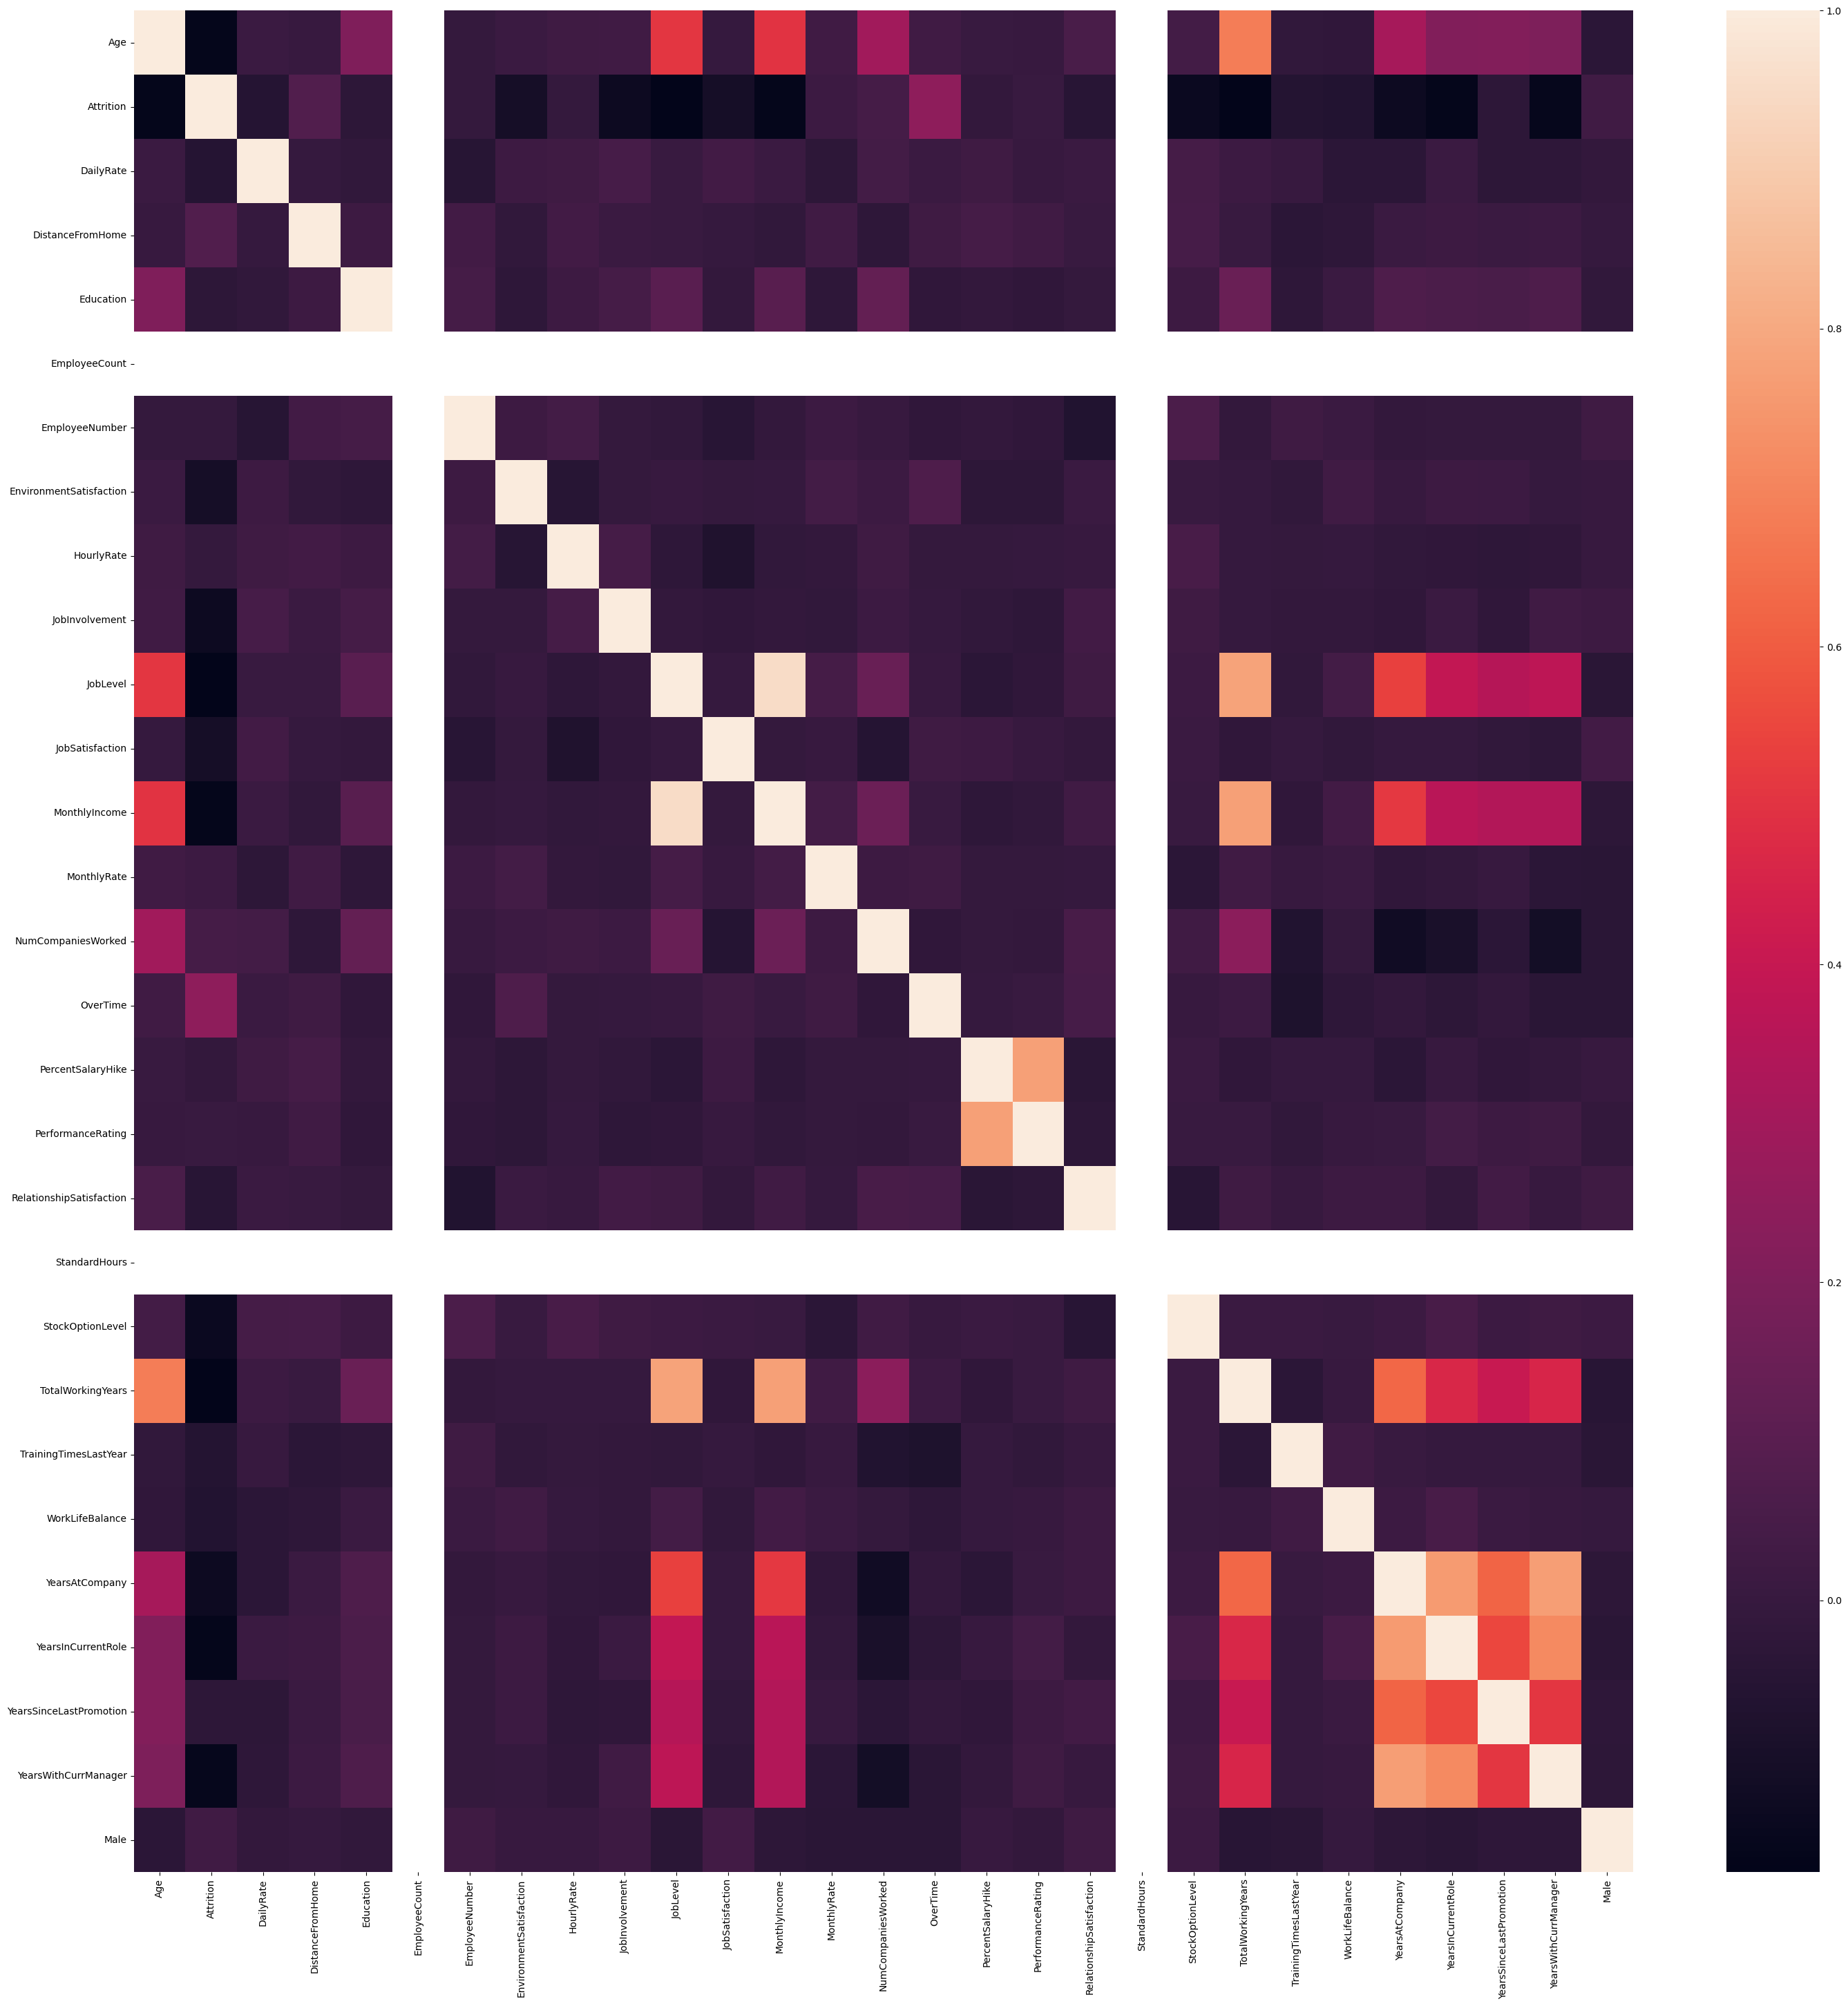

In [18]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(),annot=False)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin



### Scale

In [20]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

class Droping (BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    def transform(self, df):
        df2 = df.copy()
        df2.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)
        df2['Age'] = df2['Age'] /df2['Age'].abs().max()
        df2['MonthlyIncome'] = df2['MonthlyIncome'] /df2['MonthlyIncome'].abs().max()
        cat_df=df2.select_dtypes(include='object')
        print(cat_df.columns)
        for col in cat_df.columns:
            le=LabelEncoder()
            df2[col]=le.fit_transform(df2[col])
        print(df2.select_dtypes(include='object'))        
        return df2


In [21]:
"""
chng = Changeing()
pipeln = Pipeline([('Droping',drp), ('Changeing',chng)])
newData = pipeln.fit_transform(df)
#newData.head()
"""
from sklearn.pipeline import Pipeline

drp = Droping()

pipeln = Pipeline([('Droping',drp)])
pipeln.fit_transform(df)
pickle.dump(pipeln, open('preprocessing.pickle', 'wb'))
df=pipeln.fit_transform(df)

df.head()

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1470 rows x 0 columns]
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.683333,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,0.816667,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,0.616667,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,0.550000,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,0.450000,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [22]:
#pdsds df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [23]:
#cat_df=df.select_dtypes(include='object')
#cat_df.columns

In [24]:
#def transform(feature):
#    le=LabelEncoder()
#    df[feature]=le.fit_transform(df[feature])
#    print(le.classes_)

In [25]:
#cat_df=df.select_dtypes(include='object')
#cat_df.columns
    

In [26]:
#for col in cat_df.columns:
#    transform(col)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.683333,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,0.816667,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,0.616667,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,0.550000,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,0.450000,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [27]:
X = df.drop('Attrition',axis=1)
Y = df.Attrition 


In [28]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.683333,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0.816667,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0.616667,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0.550000,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0.450000,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.600000,1,884,1,23,2,3,2061,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,0.650000,2,613,1,6,1,3,2062,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,0.450000,2,155,1,4,3,1,2064,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,0.816667,1,1023,2,2,3,3,2065,4,1,...,3,4,0,17,3,2,9,6,0,8


In [29]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

# Test and Validation Split 

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)


# Model Training

In [32]:
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import time


### SVM

In [33]:
svm = SVC(random_state=12345)
svm.fit(X_train, y_train)

SVC(random_state=12345)

In [34]:
start = time.time()
scores = cross_val_score(svm, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
stop = time.time()
scores1 = cross_val_score(svm, X_train, y_train, scoring="precision", cv=5, n_jobs=-1)
scores2 = cross_val_score(svm, X_train, y_train, scoring="f1", cv=5, n_jobs=-1)
scores3 = cross_val_score(svm, X_train, y_train, scoring="recall", cv=5, n_jobs=-1)


In [35]:
start2 = time.time()
yError = cross_val_predict(svm, X_test, y_test, cv=5)
stop2 = time.time()

In [36]:
print(f"Training time: {stop - start}s")
print(f"Testing time: {stop2 - start2}s")

Training time: 1.8616702556610107s
Testing time: 0.018798828125s


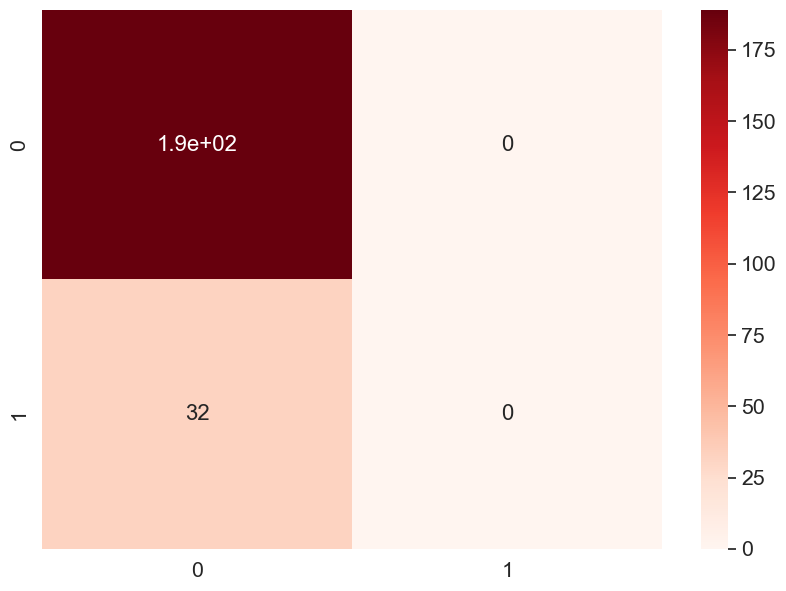

In [37]:
cmy =confusion_matrix( y_test, yError,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [38]:
print('F1 Score Test: %.5f' % f1_score(y_test, yError,average='weighted'))
print('Accuracy with train: %.5f' % scores.mean())
print('Accuracy Test: %.5f' % accuracy_score(y_test,yError))
print('Precision Test: %.5f' % precision_score(y_test, yError,average='weighted'))
print('Recall Test: %.5f' % recall_score(y_test, yError,average='weighted'))

F1 Score Test: 0.78846
Accuracy with train: 0.82941
Accuracy Test: 0.85520
Precision Test: 0.73137
Recall Test: 0.85520


C:\Users\hemre\python\odev\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [39]:
clf=LogisticRegression(max_iter=1000000, random_state=12345)
clf.fit(X_train, y_train)
start = time.time()
scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
stop = time.time()
scores1 = cross_val_score(clf, X_train, y_train, scoring="precision", cv=5, n_jobs=-1)
scores2 = cross_val_score(clf, X_train, y_train, scoring="f1", cv=5, n_jobs=-1)
scores3 = cross_val_score(clf, X_train, y_train, scoring="recall", cv=5, n_jobs=-1)

start2 = time.time()
yError = cross_val_predict(clf, X_test, y_test, cv=5)
stop2 = time.time()


In [40]:
print(f"Training time: {stop - start}s")
print(f"Testing time: {stop2 - start2}s")

Training time: 0.4191751480102539s
Testing time: 0.9137330055236816s


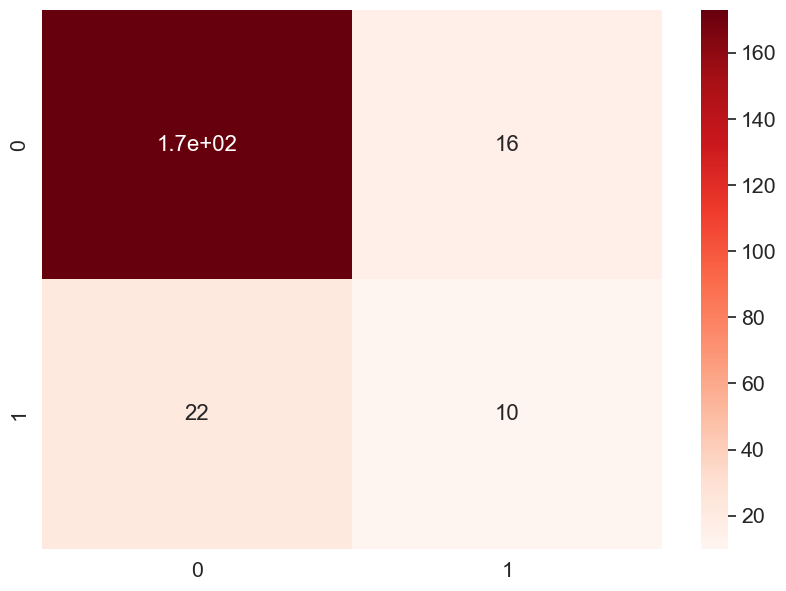

In [41]:
cmy =confusion_matrix( y_test, yError,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [42]:
print('F1 with train: %.5f' % scores2.mean())
print('F1 Score Test: %.5f' % f1_score(y_test, yError,average='weighted'))
print('Accuracy with train: %.5f' % scores.mean())
print('Accuracy Test: %.5f' % accuracy_score(y_test,yError))
print('Precision with train: %.5f' % scores1.mean())
print('Precision Test: %.5f' % precision_score(y_test, yError,average='weighted'))
print('Recall with train: %.5f' % scores3.mean())
print('Recall Test: %.5f' % recall_score(y_test, yError,average='weighted'))

F1 with train: 0.43513
F1 Score Test: 0.82050
Accuracy with train: 0.85486
Accuracy Test: 0.82805
Precision with train: 0.65703
Precision Test: 0.81441
Recall with train: 0.33153
Recall Test: 0.82805


### Random Forest

In [43]:
random_forest = RandomForestClassifier(random_state=12345)

random_forest.fit(X_train, y_train)
start = time.time()
scores = cross_val_score(random_forest, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
stop = time.time()
scores1 = cross_val_score(random_forest, X_train, y_train, scoring="precision", cv=5, n_jobs=-1)
scores2 = cross_val_score(random_forest, X_train, y_train, scoring="f1", cv=5, n_jobs=-1)
scores3 = cross_val_score(random_forest, X_train, y_train, scoring="recall", cv=5, n_jobs=-1)

start2 = time.time()
yError = cross_val_predict(random_forest, X_test, y_test, cv=5)
stop2 = time.time()

In [44]:
print(f"Training time: {stop - start}s")
print(f"Testing time: {stop2 - start2}s")

Training time: 0.215529203414917s
Testing time: 0.41573429107666016s


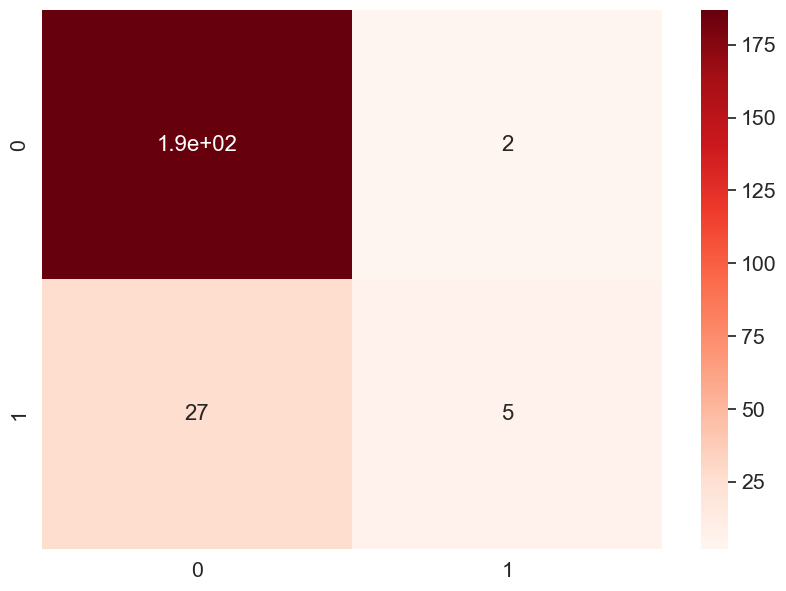

In [45]:
cmy =confusion_matrix( y_test, yError,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [46]:
print('F1 with train: %.5f' % scores2.mean())
print('F1 Score Test: %.5f' % f1_score(y_test, yError,average='weighted'))
print('Accuracy with train: %.5f' % scores.mean())
print('Accuracy Test: %.5f' % accuracy_score(y_test,yError))
print('Precision with train: %.5f' % scores1.mean())
print('Precision Test: %.5f' % precision_score(y_test, yError,average='weighted'))
print('Recall with train: %.5f' % scores3.mean())
print('Recall Test: %.5f' % recall_score(y_test, yError,average='weighted'))

F1 with train: 0.24307
F1 Score Test: 0.83079
Accuracy with train: 0.84355
Accuracy Test: 0.86878
Precision with train: 0.70379
Precision Test: 0.85073
Recall with train: 0.14910
Recall Test: 0.86878


## Compare

#### If we look the their metrics we see the list (high to low)
#### 1) Random Forest
#### 2) SVM
#### 3) Logistic Regression

#### If we look the their Train Time we see the list (low to high)
#### 1) Logistic Regression: Training time: 0.20784s
#### 2) Random Forest: Training time: 0.26326s
#### 3) SVM: Training time: 2.16321s

#### If we look the their Test Time we see the list 
####  Logistic Regression: Test time: 0.41438s
####  Random Forest: Test time: 1.67836s
####  SVM: Test time: 0.0216321s



## Overfit

#### If chech the test and traing scores we can see that no of them overfitting 

#  Parameter tuning


### SVM

In [47]:
svm = SVC()


In [48]:
params_grid_lr2={'C': [0.1, 1, 10, 20, 100, 1000], 
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                 'kernel': ['rbf'],
                 'random_state':[12345]}

In [49]:
grid_search2=GridSearchCV(svm,params_grid_lr2,cv=5,n_jobs=-1,verbose=1)


In [50]:
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf'], 'random_state': [12345]},
             verbose=1)

In [51]:
grid_search2.best_score_

0.8294091593586677

In [52]:
grid_search2.best_estimator_.get_params()


{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 12345,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [53]:
yhat = grid_search2.predict(X_test)

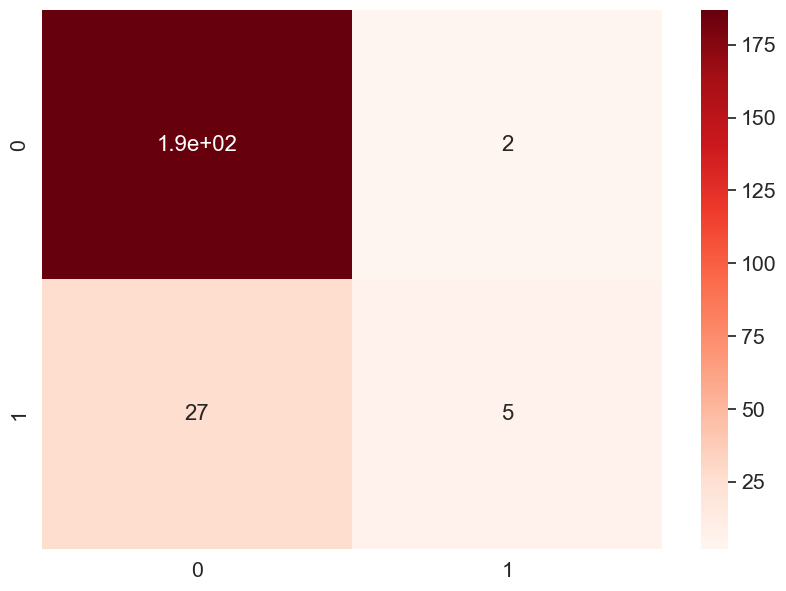

In [54]:
cmy =confusion_matrix( y_test, yError,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [55]:
print('F1 Score Test: %.5f' % f1_score(y_test, yError,average='weighted'))
print('Accuracy Test: %.5f' % accuracy_score(y_test,yError))
print('Precision Test: %.5f' % precision_score(y_test, yError,average='weighted'))
print('Recall Test: %.5f' % recall_score(y_test, yError,average='weighted'))

F1 Score Test: 0.83079
Accuracy Test: 0.86878
Precision Test: 0.85073
Recall Test: 0.86878


### Logistic Regression

In [56]:

clf_lr_temp=LogisticRegression()


In [57]:
params_grid_lr1={"penalty" : ['l2'],
                "C" : [0.001,0.01,0.09,0.1,0.9,1],
                "solver" : ['lbfgs', 'sag','saga'],
                "max_iter": [4000 ,2000,1000000],
                "class_weight": ['dict '],
                'random_state':[12345]
    
}

In [58]:
grid_search3=GridSearchCV(clf_lr_temp,params_grid_lr1,n_jobs=-1,verbose=1,cv=5)

In [59]:
grid_search3.fit(X_train,y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.09, 0.1, 0.9, 1],
                         'class_weight': ['dict '],
                         'max_iter': [4000, 2000, 1000000], 'penalty': ['l2'],
                         'random_state': [12345],
                         'solver': ['lbfgs', 'sag', 'saga']},
             verbose=1)

In [60]:
grid_search3.best_score_


0.8642838161041724

In [61]:
grid_search3.best_estimator_.get_params()


{'C': 0.9,
 'class_weight': 'dict ',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 4000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 12345,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
yhat = grid_search3.predict(X_test)

In [63]:
cmy =confusion_matrix( y_test, yhat,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))


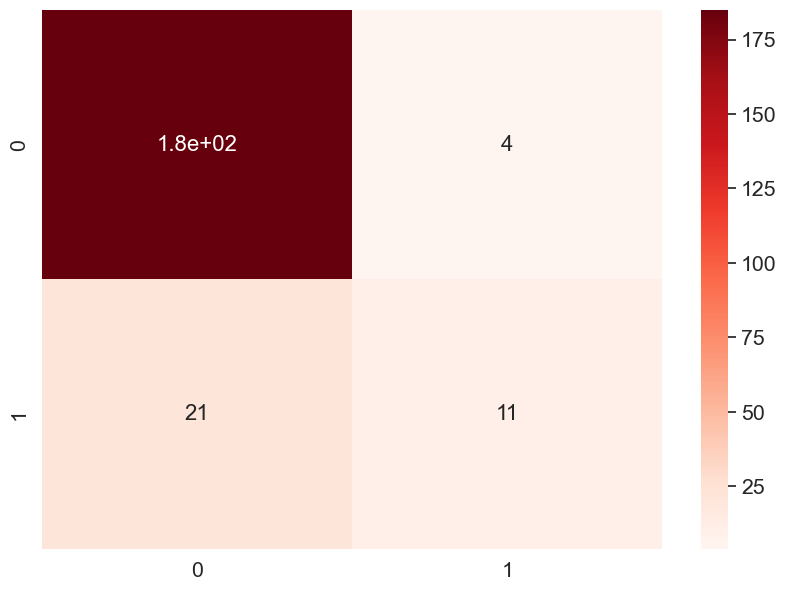

In [64]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [65]:
print('F1 Score Test: %.5f' % f1_score(y_test, yhat,average='weighted'))
print('Accuracy Test: %.5f' % accuracy_score(y_test,yhat))
print('Precision Test: %.5f' % precision_score(y_test, yhat,average='weighted'))
print('Recall Test: %.5f' % recall_score(y_test, yhat,average='weighted'))

F1 Score Test: 0.86885
Accuracy Test: 0.88688
Precision Test: 0.87421
Recall Test: 0.88688


### Random Forest

In [66]:
random_forest = RandomForestClassifier()

In [67]:
params_grid_lr2={'bootstrap': [True],
 'max_depth': [20, 40],
 'min_samples_leaf': [4],
 'min_samples_split': [ 5],
 'n_estimators': [2000, 1400],
 'random_state':[12345]}



In [68]:
grid_search=GridSearchCV(random_forest,params_grid_lr2,n_jobs=-1,verbose=1,cv=5)

In [69]:
grid_search.fit(X_train,y_train)


grid_search.best_score_



Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.8463681459828152

In [70]:
yhat = grid_search.predict(X_test)


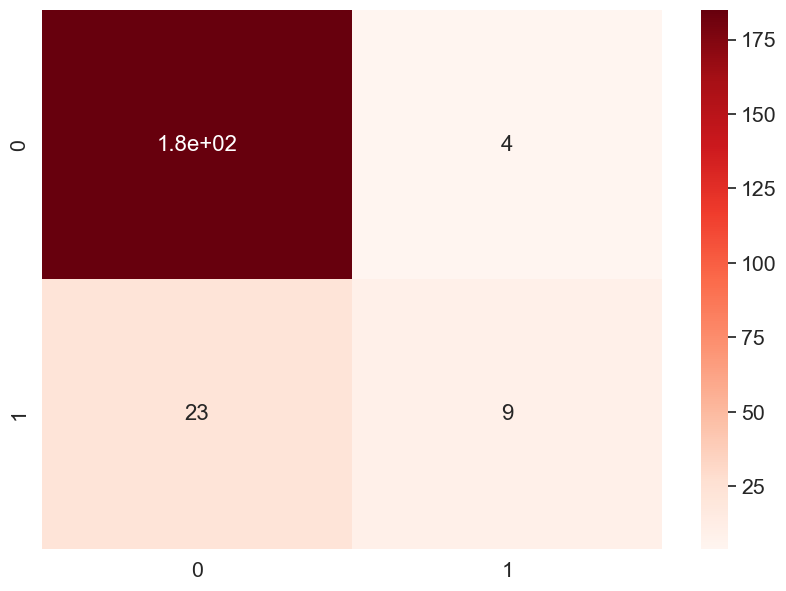

In [71]:
cmy =confusion_matrix( y_test, yhat,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [72]:
print('F1 Score Test: %.5f' % f1_score(y_test, yhat,average='weighted'))
print('Accuracy Test: %.5f' % accuracy_score(y_test,yhat))
print('Precision Test: %.5f' % precision_score(y_test, yhat,average='weighted'))
print('Recall Test: %.5f' % recall_score(y_test, yhat,average='weighted'))

F1 Score Test: 0.85496
Accuracy Test: 0.87783
Precision Test: 0.86088
Recall Test: 0.87783


## Perform Compare

#### If we look the their metrics we see the list of increasing (Accuracy)
#### Logistic Regression 0.81448 --> 0.88688
#### SVM 0.85520 --> 0.86878
#### Random Forest 0.86878 --> 0.87783
#### we can say that logistic with parameter tuning is best now


In [73]:
df2 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [74]:
df2.drop(df2.columns.difference(['YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','TotalWorkingYears', 'Attrition']), axis=1, inplace=True)

In [75]:
def transform(feature):
    le=LabelEncoder()
    df2[feature]=le.fit_transform(df2[feature])
    print(le.classes_)

In [76]:
cat_df2=df2.select_dtypes(include='object')
cat_df2.columns

Index(['Attrition'], dtype='object')

In [77]:
for col in cat_df2.columns:
    transform(col)

['No' 'Yes']


[0.00989207 0.05063597 0.12299203 0.1027236  0.05070475 0.66305158]


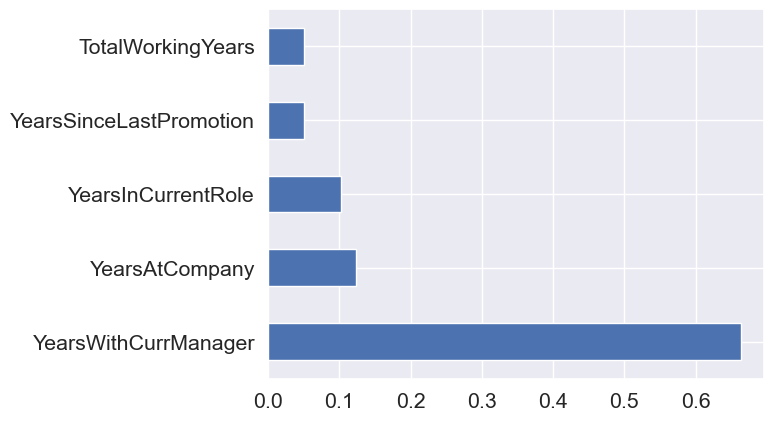

In [78]:
X1 = df2.iloc[:,0:35]  #independent columns
y1 = df2.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [79]:
df2.head()


,Attrition,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,8,6,4,0,5
1,0,10,10,7,1,7
2,1,7,0,0,0,0
3,0,8,8,7,3,0
4,0,6,2,2,2,2


In [80]:
X2 = df2.drop('Attrition',axis=1)
Y2 = df2.Attrition

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X2,Y2,test_size=0.15)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)

In [82]:
clf=LogisticRegression(max_iter=1000000, C=1, penalty='l2',class_weight = 'dict', solver='lbfgs' ,random_state=12345 )
clf.fit(X_train, y_train)
start = time.time()
scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
stop = time.time()
scores1 = cross_val_score(clf, X_train, y_train, scoring="precision", cv=5, n_jobs=-1)
scores2 = cross_val_score(clf, X_train, y_train, scoring="f1", cv=5, n_jobs=-1)
scores3 = cross_val_score(clf, X_train, y_train, scoring="recall", cv=5, n_jobs=-1)

start2 = time.time()
yError = cross_val_predict(clf, X_test, y_test, cv=5)
stop2 = time.time()

In [83]:
print(f"Training time: {stop - start}s")
print(f"Testing time: {stop2 - start2}s")

Training time: 0.00916290283203125s
Testing time: 0.01674175262451172s


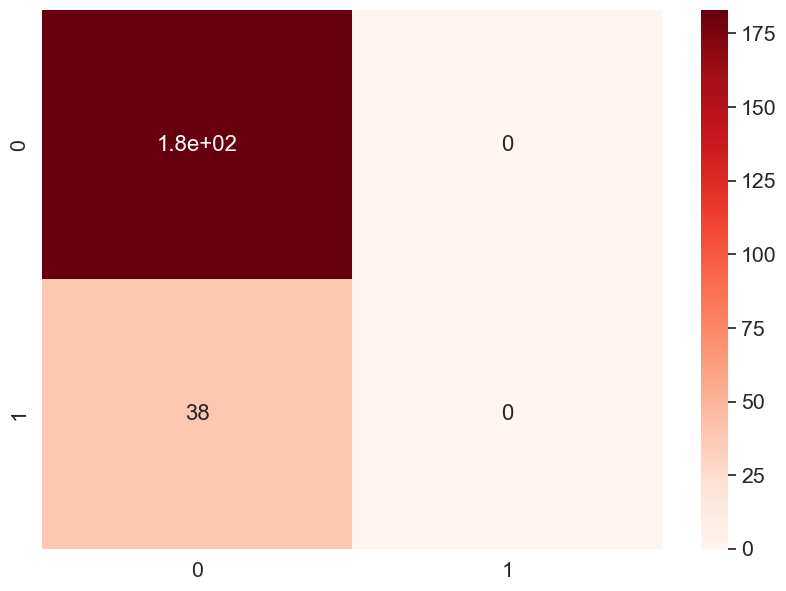

In [84]:
cmy =confusion_matrix( y_test, yError,labels=[0,1])
df_cmy = pd.DataFrame(cmy, range(2), range(2))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmy, annot=True, annot_kws={"size": 16},cmap="Reds") # font size
plt.show()

In [85]:
print('F1 Score Test: %.5f' % f1_score(y_test, yError,average='weighted'))
print('Accuracy with train: %.5f' % scores.mean())
print('Accuracy Test: %.5f' % accuracy_score(y_test,yError))
print('Precision Test: %.5f' % precision_score(y_test, yError,average='weighted'))
print('Recall Test: %.5f' % recall_score(y_test, yError,average='weighted'))

F1 Score Test: 0.75017
Accuracy with train: 0.83223
Accuracy Test: 0.82805
Precision Test: 0.68567
Recall Test: 0.82805


C:\Users\hemre\python\odev\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
pickle.dump(clf, open('model.pickle', 'wb'))


## Perform Compare



#### Logistic Regression  0.88688 --> 0.82805 düştü
#### Training time: ın baya azaldığını gözlemleyebiliriz buradan 0.02s e adar düştü
#### Testing time: 0.047s e kadar düştü burada da
#### kısaca performans düştü ama fazlasıyla hızlandı


In [87]:
 pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.
